In [57]:
import torch
import pandas as pd
from torch.utils.data import Dataset , DataLoader
import numpy as np
import torch.nn as nn
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

In [58]:
ok_gesture=pd.read_csv("./csv/ok.csv")
yes_gesture=pd.read_csv("./csv/yes.csv")
zero_gesture=pd.read_csv("./csv/zero.csv")
call_gesture=pd.read_csv("./csv/call.csv")
five_gesture=pd.read_csv("./csv/five.csv")
one_gesture=pd.read_csv("./csv/one.csv")
rock_gesture=pd.read_csv("./csv/rock.csv")
love_gesture=pd.read_csv("./csv/love.csv")

In [59]:
ok_gesture["gesture"]="ok"
yes_gesture["gesture"]="yes"
zero_gesture["gesture"]="zero"
call_gesture["gesture"]="call"
five_gesture["gesture"]="five"
one_gesture["gesture"]="one"
rock_gesture["gesture"]="rock"
love_gesture["gesture"]="love"

In [60]:
all_dataset=pd.concat([ok_gesture.iloc[:,:],call_gesture.iloc[:,:],
                         five_gesture.iloc[:,:],rock_gesture.iloc[:,:],
                         yes_gesture.iloc[:,:],zero_gesture.iloc[:,:],
                         one_gesture.iloc[:,:],love_gesture.iloc[:,:]],axis=0)

In [61]:
features = all_dataset.iloc[:, :-1]  # all columns except the last one
labels = all_dataset.iloc[:, -1]     # the last column

# Initialize PCA, reducing to 2 dimensions for easy visualization
pca = PCA(n_components=2)
principal_components = pca.fit_transform(features)

In [62]:
gesture_labels=sorted(list(set(all_dataset["gesture"])))
n_classes=len(gesture_labels)
print(n_classes)
print(gesture_labels)

8
['call', 'five', 'love', 'ok', 'one', 'rock', 'yes', 'zero']


In [63]:
class_to_num=dict(zip(gesture_labels,range(n_classes)))
num_to_class={v:k for k,v in class_to_num.items()}
num_labels=[] #corresponding label to the all_dataset
for class_label in list(labels):
    num_labels.append(class_to_num[class_label])

In [65]:
class MLP(nn.Module):
    def __init__(self) :
        super().__init__()
        self.net=nn.Sequential(
            nn.Linear(24,24),nn.ReLU(),
            nn.Linear(24,14),nn.ReLU(),
            nn.Linear(14,8)
        )
        # 初始化模型的权重和偏置为 Float 类型
        for layer in self.net:
            if isinstance(layer, nn.Linear):
                layer.weight.data = layer.weight.data.double()
                layer.bias.data = layer.bias.data.double()
                
    def forward (self,x):
        return self.net(x)


model_path = './MLP_model .ckpt'


model=MLP()
model=model.to('cpu')
model.load_state_dict(torch.load(model_path))

<All keys matched successfully>

In [66]:
np_dataset=all_dataset.iloc[:,:-1].to_numpy()
tensor_dataset=torch.tensor(np_dataset)
print(tensor_dataset.shape)

torch.Size([800, 24])


In [67]:
outputs=model(tensor_dataset)

In [68]:
print(outputs.shape)

torch.Size([800, 8])


In [69]:
pca = PCA(n_components=2)  # 降至两个维度
principal_components = pca.fit_transform(outputs.detach().numpy())

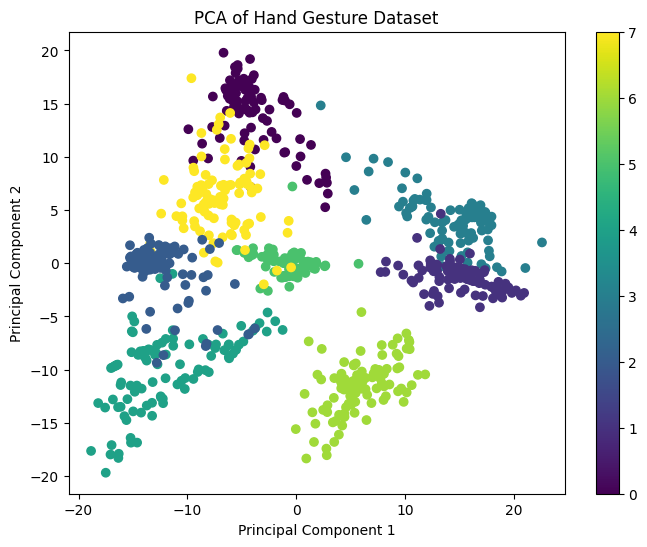

In [70]:
plt.figure(figsize=(8, 6))
scatter = plt.scatter(principal_components[:, 0], principal_components[:, 1], c=num_labels, cmap='viridis')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of Hand Gesture Dataset')
plt.colorbar(scatter)
plt.show()